# Microsoft AI School - Machine Learning


# Sales Analysis Based on Advertising Cost by Different Advertising Platforms

## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## UX Modification

<Axes: >

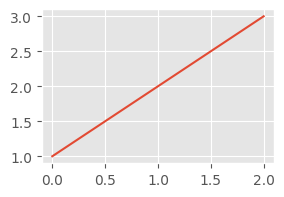

In [4]:
plt.style.use("ggplot")
pd.Series([1,2,3]).plot(figsize=(3,2))

## Scrape advertisement sales data from Git

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/main/advertising.csv')

## Install additional library

In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


## Check obtained dataframe

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Understanding the Data

* Advertising cost for TV, Radio, and Newspaper are in thousands.
* Number of sales are in thousands.

### Sales Visualization Based on Advertising Cost Across Different Platforms.

#### scatterplot

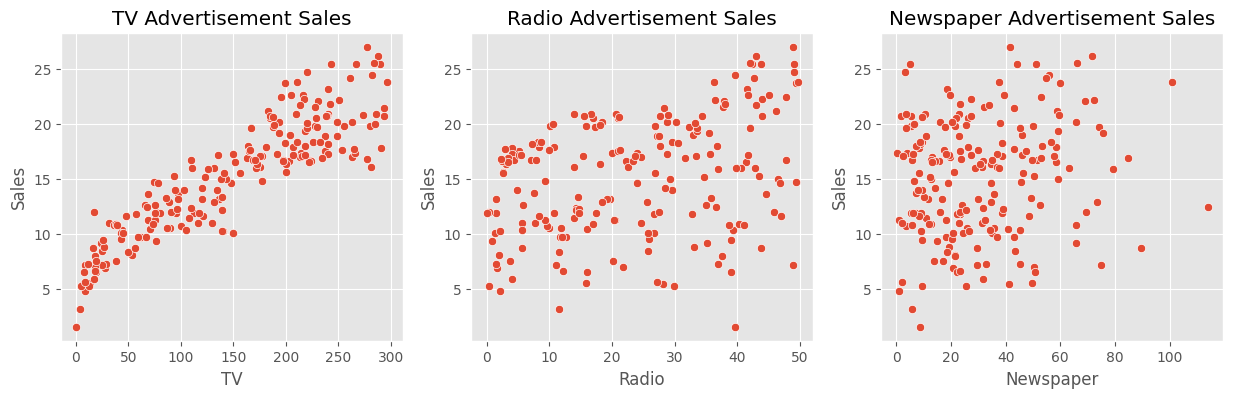

In [9]:
plt.figure(figsize=(15, 4))

# Platform: TV
plt.subplot(1, 3, 1)    # First ploft of a grid with 1 row, 3 columns
sns.scatterplot(data = df, x = "TV", y = "Sales")
plt.title("TV Advertisement Sales")

# Platform: Radio
plt.subplot(1, 3, 2)    # Second ploft of a grid with 1 row, 3 columns
sns.scatterplot(data = df, x = "Radio", y = "Sales")
plt.title("Radio Advertisement Sales")

# Platform: Newspaper
plt.subplot(1, 3, 3)    # Third ploft of a grid with 1 row, 3 columns
sns.scatterplot(data = df, x = "Newspaper", y = "Sales")
plt.title("Newspaper Advertisement Sales")

plt.show()

#### regplot

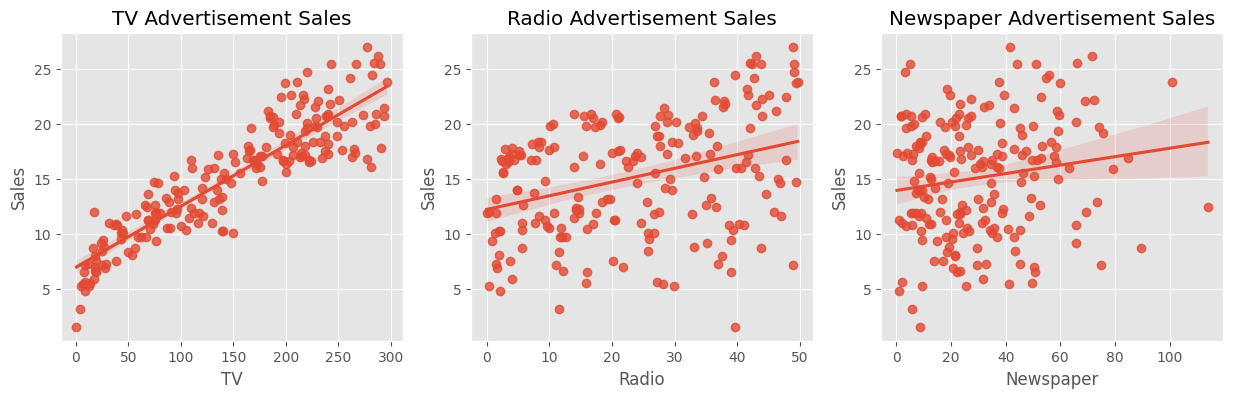

In [10]:
plt.figure(figsize=(15, 4))

# Platform: TV
plt.subplot(1, 3, 1)    # First ploft of a grid with 1 row, 3 columns
sns.regplot(data = df, x = "TV", y = "Sales")
plt.title("TV Advertisement Sales")

# Platform: Radio
plt.subplot(1, 3, 2)    # Second ploft of a grid with 1 row, 3 columns
sns.regplot(data = df, x = "Radio", y = "Sales")
plt.title("Radio Advertisement Sales")

# Platform: Newspaper
plt.subplot(1, 3, 3)    # Third ploft of a grid with 1 row, 3 columns
sns.regplot(data = df, x = "Newspaper", y = "Sales")
plt.title("Newspaper Advertisement Sales")

plt.show()

### Correlation Coefficient

In [11]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


* TV shows the strongest sales correlation while Newspaper shows the weakest correlation.

<Axes: >

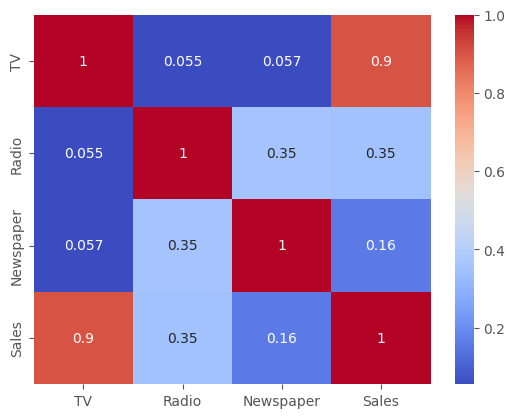

In [12]:
# Correlation Coefficient Heatmap
sns.heatmap(df.corr(), cmap = "coolwarm", annot = True)

## Simple Linear Regression

* Required Library: scikit-learn

### Predict sales based on the number of TV advertisements

In [13]:
# Initialzie variables
X = df[["TV"]]  # independet variables are of 2-dimensional
y = df["Sales"]

#### Split training and test dataset

import

In [14]:
from sklearn.model_selection import train_test_split

data split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 1), (50, 1), (150,), (50,))

visualization

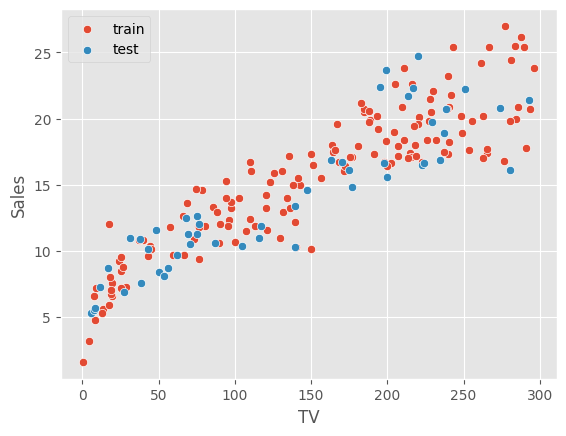

In [17]:
sns.scatterplot(x = X_train["TV"], y = y_train, label = "train")
sns.scatterplot(x = X_test["TV"], y = y_test, label = "test");

## Model Development

imports

In [18]:
from sklearn.linear_model import LinearRegression

Model Creation

In [19]:
# Linear Regression model
lr = LinearRegression()

Model Training

In [20]:
lr.fit(X = X_train, y = y_train)

LinearRegression()

## Model Evaluation

imports

In [21]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

prediction value for test data

In [22]:
pred = lr.predict(X_test)

Model evaluation using loss metrics

In [23]:
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"MSE : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R2 : {r2:.2f}")

MSE : 5.51
RMSE : 2.35
MAE : 1.87
R2 : 0.80


Compare model prediction with the real value

In [24]:
df_pred = pd.DataFrame({"X_test": X_test["TV"],
                        "y_test": y_test,
                        "y_pred": pred})

df_pred["error"] = df_pred["y_test"] - df_pred["y_pred"]
df_pred.head(10)

,X_test,y_test,y_pred,error
95,163.3,16.9,16.143474,0.756526
15,195.4,22.4,17.921382,4.478618
30,292.9,21.4,23.321569,-1.921569
158,11.7,7.3,7.746876,-0.446876
128,220.3,24.7,19.300506,5.399494
115,75.1,12.6,11.258382,1.341618
69,216.8,22.3,19.106654,3.193346
170,50.0,8.4,9.868180,-1.468180
174,222.4,16.5,19.416818,-2.916818
45,175.1,16.1,16.797035,-0.697035


Error Manual Calculation

In [25]:
my_mae = abs(df_pred["error"]).mean()
my_mse = np.square(df_pred["error"]).mean()
my_rmse = np.sqrt(mse)
my_rss = np.square(df_pred["y_test"] - df_pred["y_pred"]).sum()
my_tss = np.square(df_pred["y_test"] - df_pred["y_test"].mean()).sum()
my_r2 = 1 - (my_rss/my_tss)

print(f"MSE : {my_mse:.2f}")
print(f"RMSE : {my_rmse:.2f}")
print(f"MAE : {my_mae:.2f}")
print(f"R2 : {my_r2:.2f}")

MSE : 5.51
RMSE : 2.35
MAE : 1.87
R2 : 0.80


## Model Training Result

regression coefficient

In [26]:
w = lr.coef_
print("Regression Coefficient: ", w)

Regression Coefficient:  [0.05538653]


intercept

In [27]:
b = lr.intercept_
print("Intercept: ", b)

Intercept:  7.098853680118275


Linear Regression Equation

In [28]:
print(f"{w[0]} * TV + {b}")

0.05538653085519158 * TV + 7.098853680118275


Visualizing actual value and predicted value

<Axes: xlabel='TV', ylabel='Sales'>

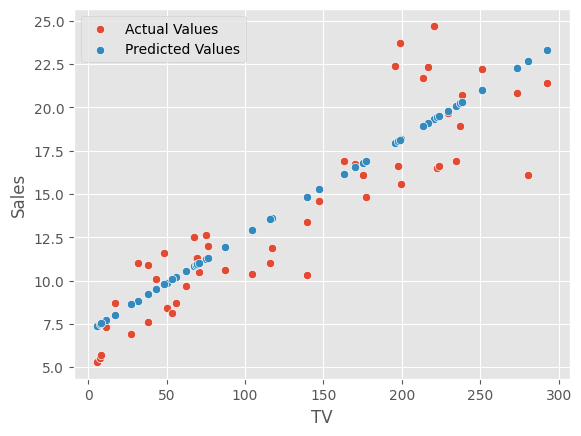

In [29]:
sns.scatterplot(x = X_test["TV"], y = y_test, label = "Actual Values")
sns.scatterplot(x = X_test["TV"], y = pred, label = "Predicted Values")

Visualizing the difference between the actual values and predicted values

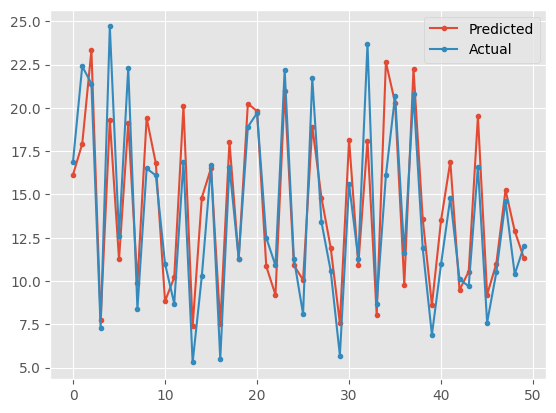

In [30]:
plt.plot(pred, marker = ".", label = "Predicted")
plt.plot(np.array(y_test), marker = ".", label = "Actual")
plt.legend();

## Predicting New Data

In [31]:
TV = 100    # in thousands
lr.predict([[TV]])

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.63750677])

In [32]:
# Plugging in values in the equation
print(w * TV + b)

[12.63750677]


# Multiple Regression

## Variable Initialization

In [33]:
X2 = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]

## Analyzing the Data Distribution of Independent Variables

<Axes: >

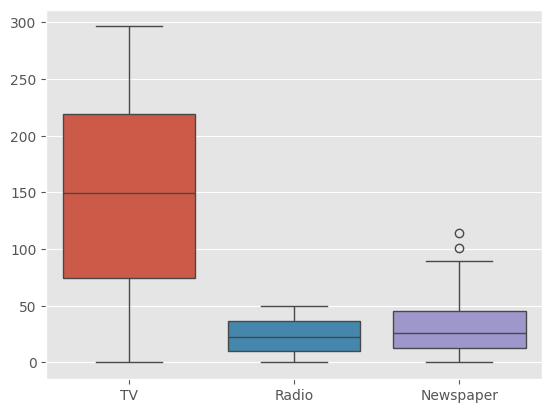

In [34]:
sns.boxplot(X2)

## Data Scaling

imports

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

scaled_TV = X2_scaled[:,0]
scaled_Radio = X2_scaled[:, 1]
scaled_Newspaper = X2_scaled[:, 2]

print("\tscaled_TV\t\t scaled_Radio\t\t scaled_Newspaper")
print(f"MEAN\t{scaled_TV.mean()}\t {scaled_Radio.mean()}\t {scaled_Newspaper.mean()}")
print(f"STD\t{scaled_TV.std()}\t\t\t {scaled_Radio.std()}\t\t\t {scaled_Newspaper.std()}")
print(f"MAX\t{scaled_TV.max()}\t {scaled_Radio.max()}\t {scaled_Newspaper.max()}")
print(f"MIN\t{scaled_TV.min()}\t {scaled_Radio.min()}\t {scaled_Newspaper.min()}")

	scaled_TV		 scaled_Radio		 scaled_Newspaper
MEAN	1.2212453270876723e-16	 -4.529709940470639e-16	 2.220446049250313e-16
STD	1.0			 1.0			 0.9999999999999999
MAX	1.744029255437918	 1.778300483288375	 3.8411707150992718
MIN	-1.7088234692862663	 -1.5708681061368763	 -1.3926464877239573


## Data Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X2_scaled, y, random_state = 42)

In [39]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 3) (50, 3) (150,) (50,)


## Model Development

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr2 = LinearRegression()

model training

In [42]:
lr2.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [43]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

In [44]:
pred = lr2.predict(X_test)

In [45]:
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"MSE : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R2 : {r2:.2f}")

MSE : 2.40
RMSE : 1.55
MAE : 1.12
R2 : 0.91


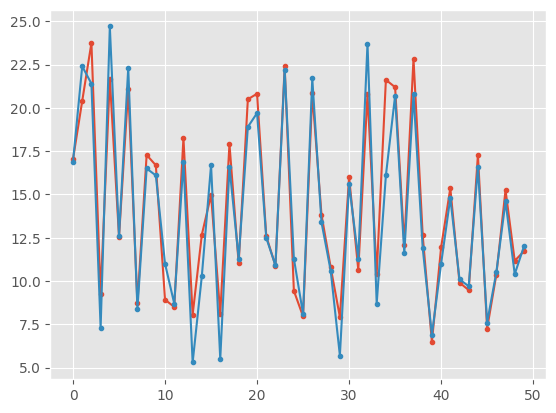

In [46]:
plt.plot(pred, marker = ".", label = "Predicted")
plt.plot(np.array(y_test), marker = ".", label = "Actual")

## Model Training Result

In [47]:
w2 = lr2.coef_
print(f"Regression Coefficient: {w2}")

b2 = lr2.intercept_
print(f"Intercept: {b2}")

print(f"Multiple Linear Regression Equation: {w2[0]} * TV + {w2[1]} * Radio + {w2[2]} * Newspaper + {b2}")

Regression Coefficient: [4.67709227 1.4774023  0.09352121]
Intercept: 15.22473459736965
Multiple Linear Regression Equation: 4.677092268978724 * TV + 1.4774023036363388 * Radio + 0.0935212124232997 * Newspaper + 15.22473459736965


## Predicting New Data

In [48]:
new_data = [[175, 15, 2]]

#### Data Scaling

Scaling new data is required to achieve consistency and accuracy as data used to train the model is scaled.

In [49]:
new_data_scaled = scaler.transform(new_data)

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### Prediction

In [50]:
lr2.predict(new_data_scaled)

array([15.80426509])

# Polynomila Regression

## Imports

In [51]:
from sklearn.preprocessing import PolynomialFeatures

## PolynomilaFeatures

In [53]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X2)
X_poly.shape

(200, 10)

### Scaling

In [54]:
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

## Data Split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 10) (50, 10) (150,) (50,)


## Model Development

### Model Creation
* Polynomial Regression

In [57]:
pr = LinearRegression()
pr.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [59]:
# r2_score
print(f"train: {pr.score(X_train, y_train)}")
print(f"test: {pr.score(X_test, y_test)}")

train: 0.9443621240974699
test: 0.9034689244043839
